In [ ]:
#about 40% of the submission are based on new products
#therefore, need to create a dataset of the first month of sales per product
#then do EDA on it
    #what is the price variation of the variable
    #are the timing specifities - when bought in November has an impact
    #are the products that are to be realised all of the same category?
    #are the shops we need to predict all open?
    #how do shops tend to perform over the year?  Are there some that get a greater increase?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import datetime as dt
dateCols = ['date']
train2=pd.read_csv("/home/cdsw/train_plus_not_imputted.csv",parse_dates=dateCols)
train2["TotalRevenue"]=train2.item_cnt_day*train2.item_price
train2["Month"]=train2.date.dt.month
train2["Year"]=train2.date.dt.year
train2['YM'] = train2['Year']*100+train2["Month"]

#create an average per month - see how it changes
sales_per_item_PM= train2.groupby(['item_id', "shop_id",'YM'])['item_cnt_day',"TotalRevenue" ].sum().reset_index()
sales_per_item_PM["AvPrice"]=sales_per_item_PM.TotalRevenue/sales_per_item_PM.item_cnt_day
sales_per_item_PM["id"]=sales_per_item_PM.item_id.astype("str")+"_"+sales_per_item_PM.shop_id.astype("str")

In [18]:
#create a dataset which is sorted by date
firstsale=train2.groupby(["YM","date", "item_id"])["item_cnt_day"].sum().reset_index().sort_values("date")
#drop_duplicates
firstsale2=firstsale.drop_duplicates(subset=["item_id"],keep="first").reset_index()

In [20]:
sales_per_item_PM["prod_month"]=sales_per_item_PM.YM.astype("str")+"_"+sales_per_item_PM.item_id.astype("str")
firstsale2["prod_month"] = firstsale2.YM.astype("str")+"_"+firstsale2.item_id.astype("str")

In [22]:
firstsale2["present"]=1
firsts=pd.merge(sales_per_item_PM, firstsale2[["prod_month","present"]],how="left",on="prod_month")

In [29]:
#those where present is null, are not the first date, remove them
firsts2=firsts[firsts.present.notnull()]
#many products will have been sold before hand and so because of the start of Jan 2013, this is an artifical start
firsts3=firsts2[firsts2.YM>201301]
print("Number of unique items:",len(set(firsts3.item_id)))
print("Vs number of observations in data set:" , len(firsts3.item_id))

Number of unique items: 11852
Vs number of observations in data set: 33359


In [39]:
#so there are on average 3 obs per new product here
#need to find out how many days it was on sale for  - and what was the first day it was sold - was it towards the start of the month?
train2["prod_month"]=train2.YM.astype("str")+"_"+train2.item_id.astype("str")
train3=pd.merge(train2, firstsale2[["prod_month","present"]], how="left",on="prod_month")

#non nulls only -then need to sort by item and days and keep first - because have shop info here meaning dates are duplicated
train4=train3[train3.present.notnull()].sort_values(["item_id","date"])
train5=train4.drop_duplicates(subset=["item_id","date"],keep="first")

#then group by
Numsales=train5.groupby(["item_id"])["date"].count().reset_index(name="NumDays_1stM")

In [53]:
#identify the day where the first sale occured 
firstdate=train5.drop_duplicates(["item_id"],keep="first")
firstdate["Day"]=firstdate["date"].dt.day


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [63]:
Numsales2=pd.merge(Numsales, firstdate, how="left", on="item_id")

#Numsales3=Numsales2.pivot_table(index=["Day"],columns="NumDay_1stM")
#Numsales3=Numsales2.groupby(["Day","NumDays_1stM"])["Day"].count().reset_index(name="Freq")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.crosstab(Numsales2['Day'],Numsales2['NumDays_1stM']))

NumDays_1stM,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,342,85,69,59,52,60,52,48,54,53,56,39,35,37,38,37,23,30,26,24,29,32,22,20,24,30,31,24,33,28,25
2,216,113,107,101,132,106,105,113,89,76,76,55,81,48,45,46,35,32,26,24,18,14,14,10,20,7,5,2,5,1,0
3,315,187,148,135,121,88,100,72,74,52,36,33,23,9,11,10,11,10,11,8,3,2,1,3,0,0,0,0,0,0,0
4,282,153,140,111,89,82,58,50,23,17,12,9,11,7,9,3,1,2,0,1,1,0,0,0,0,0,0,0,0,0,0
5,400,264,208,155,133,86,63,56,30,19,13,9,10,6,5,5,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0
6,409,244,146,111,106,63,45,22,20,10,5,0,6,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,393,190,134,93,41,39,15,7,5,5,5,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,399,217,148,69,43,15,13,6,4,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,516,266,112,80,15,16,11,8,2,3,1,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#what does this tell me & what do I do with this
#Products are introduced through a month
#Need to look at when the product introduced in Nov - think data goes to 11th?
#are there products which need to predict which aren't in data set until now and aren't in Nov to date
    #check those that are sold in December too - if not, set those to 0
    #those that are sold in not to date (inc 11/11 but are in Dec)- examine categories, and price in December

In [83]:
#import test and get unique prods
test=pd.read_csv("/home/cdsw/01_future-sales/data/test.csv")
test_prods=test.drop_duplicates(["item_id"],keep="first")
#join date of firstdate

req=pd.merge(test_prods, firstdate[["item_id","date","YM"]], how="left",on="item_id")

print(len(req))
print(len(set(req.item_id)))
#find those which have data pre Nov 15
print(len(req[req.date<="2015-10-31"]))
#those not pre Nov 15
    #any which are not sold at all - including Dec
print(len(req[req.date.isnull()]))
    #how many sold in Nov & Dec
print(len(req[(req.date>"2015-10-31") &(req.date<="2015-12-31")]))

5100
5100
4737
363
0


In [81]:
#so want to know of these 363, how many shops are they sold in as have 102k to predict
new=req[req.date.isnull()]
newd=sales_per_item_PM[sales_per_item_PM.item_id.isin(new.item_id)]
#so have no information on the new products in the train data - ok
len(set(newd.id))

0

In [82]:
#just then to confirm that of these 363, generate required 102k combinations
len(test[test.item_id.isin(new.item_id)])
#this is a weird mismatch

15246

In [84]:
#recreate the checks done in submission prep - which got to 102k - 
#then find the data where apparently have no submissions - where the product isn't in new here
Nov=pd.read_csv("/home/cdsw/Novdata_for_preds.csv")
#reduce the data down to those which are non null
Nov2=Nov[Nov.PStdMinus1.notnull()]

#the amount of non found combos is surprising - check the match to Nov2 and to Nov
test["identifer"]=test.item_id.astype("str")+"_"+test.shop_id.astype("str")
check=test[test.identifer.isin(Nov2.ids)]
print("Number where based on history, it might be something other than zero:",check.shape[0])
check2=test[test.identifer.isin(Nov.ids)]
print("Number which can just predict zeros for:",check2.shape[0]-check.shape[0])
check3=test[~test.identifer.isin(Nov.ids)]
print("Number which are new products:", check3.shape[0])

Number where based on history, it might be something other than zero: 47696
Number which can just predict zeros for: 63708
Number which are new products: 102796


In [87]:
#from check 3, find the 300 or so whihc are in there and account for how many (hope 15k) then what is not tying up
check3[check3.item_id.isin(new.item_id)].shape

(15246, 4)

In [90]:
check4=check3[~check3.item_id.isin(new.item_id)]
check4.shape

(87550, 4)

In [102]:
#so search for these variables in train2 & then also look at Nov
#which ones are require a prediction but are not in data to predict 0 or otherwise
#set(Nov.ids[Nov.item_id==8192])
itsthecombos=check4[check4.item_id==8192]
itsthecombos[~itsthecombos.identifer.isin(Nov.ids[Nov.item_id==8192])]

,ID,shop_id,item_id,identifer
1569,1569,5,8192,8192_5
16869,16869,3,8192,8192_3
32169,32169,10,8192,8192_10
37269,37269,12,8192,8192_12
62769,62769,22,8192,8192_22
108669,108669,50,8192,8192_50
113769,113769,49,8192,8192_49
154569,154569,55,8192,8192_55
164769,164769,36,8192,8192_36
190269,190269,46,8192,8192_46


In [122]:
sales_per_item_PM[sales_per_item_PM.id=="8192_5"]

,item_id,shop_id,YM,item_cnt_day,TotalRevenue,AvPrice,id,prod_month


4737 items sold previously but not in all shops


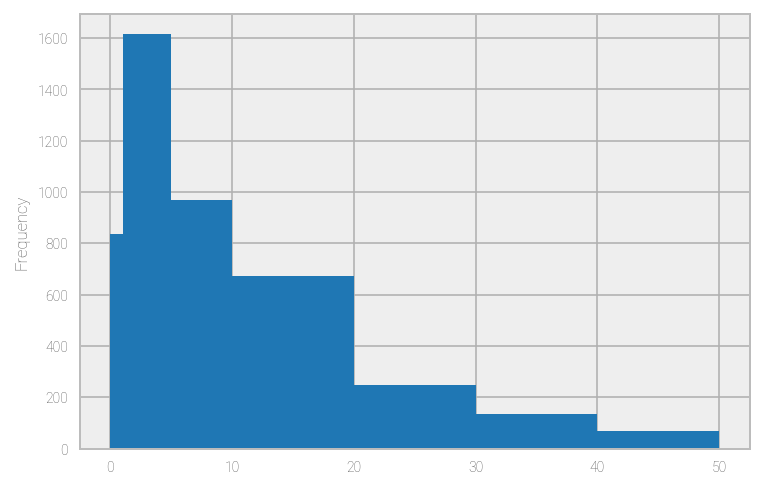

In [123]:
# so this means that there are 88k products which have been sold previously, but not in all shops
#how many products are we talking about - 
print(len(set(check4.item_id)), "items sold previously but not in all shops")
#what is their recent sales activity
    #ie for which can I assume zero sales
    #take train2, group by item_id and YM - sum item_cnt_day
prodview=train2[train2.item_id.isin(check4.item_id)]
prodview2=prodview.groupby(["YM","item_id"])["item_cnt_day"].sum().reset_index(name="SalesPM")
    #filter?
    #pivot
prodview3=prodview2.pivot_table(index=["item_id"],columns="YM",values="SalesPM",fill_value=0).reset_index()
    #stats like how many sold over the last 3 months
prodview3["Av_pri3"]=prodview3.iloc[:,32:35].mean(axis=1)

prodview3.Av_pri3.plot(kind="hist",bins=[0,1, 5, 10,20,30,40,50])

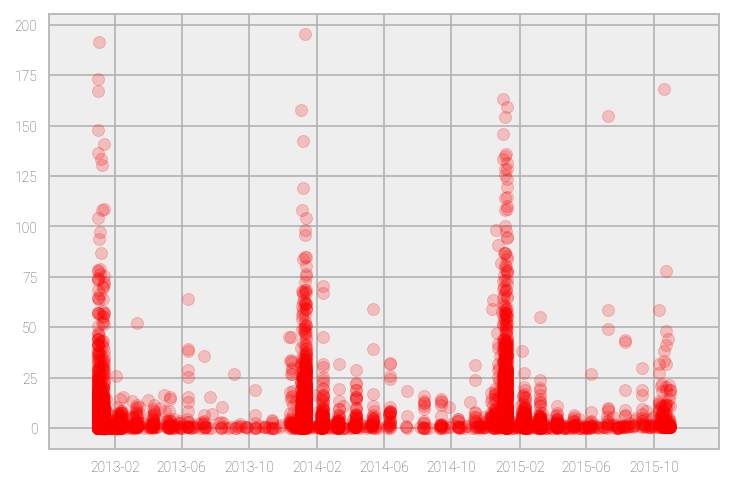

In [141]:
#so there's 4737 products here which have been sold somewhere but have NEVER been sold in certain shops

#why not just predict zeros for these
#could be that its newish and will volume will pick up shortly - how many here?  
#Add the first date / YM & plot that against average sold in 3 months - hope see strong corr
prodview4=pd.merge(prodview3, firstdate[["item_id","date","YM"]],how="left",on="item_id")

#prodview4["YM2"]="_"+prodview4.YM.astype("str")
#prodview4.plot(kind="scatter",x="date",y="Av_pri3", alpha=0.2)
prodview5=prodview4[prodview4.Av_pri3<200]
plt.scatter(list(prodview5.date), list(prodview5.Av_pri3), alpha=0.2, c = 'red')
plt.ylim=(0,100)
plt.show()

In [ ]:
#these are the products you cannot find - some ARE in the prediction - its just some prod shops combos that aren't
#there are a lot that are around zero... these are the average sales in the last 3 months
#its odd that there are prods which have high sales -av 100 plus and have been sold since 2013 but not in certain shops 
    # lok at these prods and the shops where missing - suspect have a shop closure issue
    
    #are the missin shops always the same? or often?
    
#still the case for those after 2015 07 could argue for some shops have potential


In [148]:
ex=prodview4[(prodview4.YM==201301) & (prodview4.Av_pri3>100)]
#ex.item_id.iloc[0] - returns 2308
sales_per_item_PM[sales_per_item_PM.item_id==2308].pivot_table(index=["id"],columns="YM",values="item_cnt_day",fill_value=0).reset_index()

YM,id,201301,201302,201303,201304,201305,201306,201307,201308,201309,...,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512
0,2308_0,4,8,0,2,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2308_1,5,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2308_10,5,6,3,5,4,1,5,1,1,...,3,3,4,2,4,7,1,2,0,0
3,2308_11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2308_12,3,1,0,0,1,0,1,1,0,...,1,0,1,2,1,0,1,0,0,0
5,2308_13,0,3,0,2,1,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,2308_14,8,6,8,5,2,1,2,3,3,...,4,34,8,1,4,3,3,1,0,7
7,2308_15,16,11,8,9,10,5,16,9,9,...,5,5,6,3,5,4,3,6,1,1
8,2308_16,6,16,9,4,3,3,9,6,13,...,3,5,2,5,4,7,2,2,0,0
9,2308_17,0,0,0,0,0,1,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [150]:
#selling pretty consistently and pretty broadly
#so which shops am I missing for this product
#areshopsclosed=
check4[check4.item_id==2308]

#then find out how many sales that shop has at all
len(train2[train2.shop_id==55])

34769

In [159]:
#so no, sold products, just not this one...ever... 
#still however, can use the if sold before 6 months before for the first time, set as 0
tozero=prodview4[prodview4.YM<201506]
#how many represented in the missing data then
print("How many to set to zero:",len(check4[check4.item_id.isin(tozero.item_id)]))
print("How many remaining combinations do I need an answer for:", len(check4[~check4.item_id.isin(tozero.item_id)]))
print("Which accounts for how many products:", len(set(check4.item_id[~check4.item_id.isin(tozero.item_id)])))
print("Number of shop:", len(set(train2.shop_id)))

How many to set to zero: 78295
How many remaining combinations do I need an answer for: 9255
Which accounts for how many products: 276
Number of shop: 60


In [ ]:
#so I have to build 2 models - 
#predict combinations for products that have been sold only in the last 6 months but not in some shops- 9255
    #here you will also get predictions for existing shops - need to decide which of these to take
        #need to generate a combination which has never been seen before -how?  Tough nut to crack...
#predict for completely new products -15k